# Curso de Manejo de Datos Faltantes: Detección y Exploración

[![Curso creado por jvelezmagic](https://img.shields.io/badge/Desarrollado%20por-%40jvelezmagic-blue?&style=for-the-badge&logo=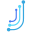)](https://jvelezmagic.com/)



## Configuración de ambiente de trabajo

```bash
pip install --upgrade pip
```

```bash
pip install pyjanitor matplotlib==3.5.1 missingno numpy pandas pyreadr seaborn session-info upsetplot==0.6.1
```

or 

```bash
pip install -r requirements.txt
```

## Importar librerías

In [1]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

## Importar funciones personalizadas

In [2]:
%run pandas-missing-extension.ipynb

## Configurar el aspecto general de las gráficas del proyecto

In [3]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

## Operar con valores faltantes

### Python

In [4]:
print(
    None or True,
    None or False,
    None == None,
    None is None,
    type(None),
    sep="\n"
 )

True
False
True
True
<class 'NoneType'>


### NumPy

In [5]:
print(
    np.nan or True,
    np.nan == np.nan,
    np.nan is np.nan,
    sep="\n"    
)

nan
False
True


### Pandas

In [6]:
test_missing_df= pd.DataFrame.from_dict(
    data=dict(
        x=[0,1,np.nan, np.nan, None],
        y=[0,1,pd.NA,np.nan,None]
    )
)
test_missing_df

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [7]:
test_missing_df.isna()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [8]:
test_missing_df.isnull()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [9]:
test_missing_df.x.isnull()

0    False
1    False
2     True
3     True
4     True
Name: x, dtype: bool

In [10]:
pd.Series([1,np.nan])

0    1.0
1    NaN
dtype: float64

In [11]:
pd.Series([pd.to_datetime("2025-01-01"),np.nan])

0   2025-01-01
1          NaT
dtype: datetime64[ns]

In [12]:
pd.Series([-1]).isnull()

0    False
dtype: bool

## Cargar los conjuntos de datos

### Pima Indians Diabetes

In [13]:
prima_indias_diabtetes_url="https://nrvis.com/data/mldata/pima-indians-diabetes.csv"

In [14]:
!wget -O ./data/prima_indias_diabtetes.csv {prima_indias_diabtetes_url} -q

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [15]:
diabetes_df=pd.read_csv("pima-indians-diabetes.csv",sep=",",names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",
    ]

)

### naniar (oceanbuoys, pedestrian, riskfactors)

#### Crear unidades de información de los conjuntos de datos

In [16]:
base_url = "https://github.com/njtierney/naniar/raw/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

#### Descargar y cargar los conjuntos de datos

In [17]:
datasets_dfs = {}
datasets_dfs[f"oceanbuoys_df"] = pyreadr.read_r("oceanbuoys.rda").get("oceanbuoys")
datasets_dfs[f"pedestrian_df"] = pyreadr.read_r("pedestrian.rda").get("pedestrian")
datasets_dfs[f"riskfactors_df"] = pyreadr.read_r("riskfactors.rda").get("riskfactors")
datasets_dfs.keys()


dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

In [18]:
# datasets_dfs = {}

# for dataset_name in datasets_names:

#     dataset_file = f"{ dataset_name }{ extension }"
#     dataset_output_file = f"./data/{ dataset_file }"
#     dataset_url = f"{ base_url }{ dataset_file }"
    
#     !wget -q -O { dataset_output_file } { dataset_url }

#     datasets_dfs[f"{ dataset_name }_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name)

# datasets_dfs.keys()

#### Incluir conjuntos de datos en nuestro ambiente local

In [19]:
locals().update(**datasets_dfs)
del datasets_dfs

### Verificar carga

In [20]:
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape, diabetes_df.shape

((736, 8), (37700, 9), (245, 34), (768, 9))

In [21]:
riskfactors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

## Tabulación de valores faltantes

In [22]:
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


### Resúmenes básicos de valores faltantes

In [23]:
riskfactors_df.shape

(245, 34)

#### Número total de valores completos (sin observaciones faltantes)

In [24]:
riskfactors_df.missing.number_complete()

np.int64(7144)

#### Número total de valores faltantes

In [25]:
riskfactors_df.missing.number_missing()

np.int64(1186)

### Resúmenes tabulares de valores faltantes

#### Variables / Columnas

##### Resumen por variable

In [26]:
riskfactors_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


###### Tabulación del resumen por variable

In [27]:
riskfactors_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


#### Casos / Observaciones / Filas

##### Resúmenes por caso

In [28]:
riskfactors_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


###### Tabulación del resumen por caso

In [29]:
riskfactors_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


### Intervalos de valores faltantes

In [30]:
(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable="weight_lbs",
        span_every=50
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


### _Run length_ de valores faltantes

In [31]:
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable="weight_lbs"
    )
)

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


## Visualización inicial de valores faltantes

### Variable

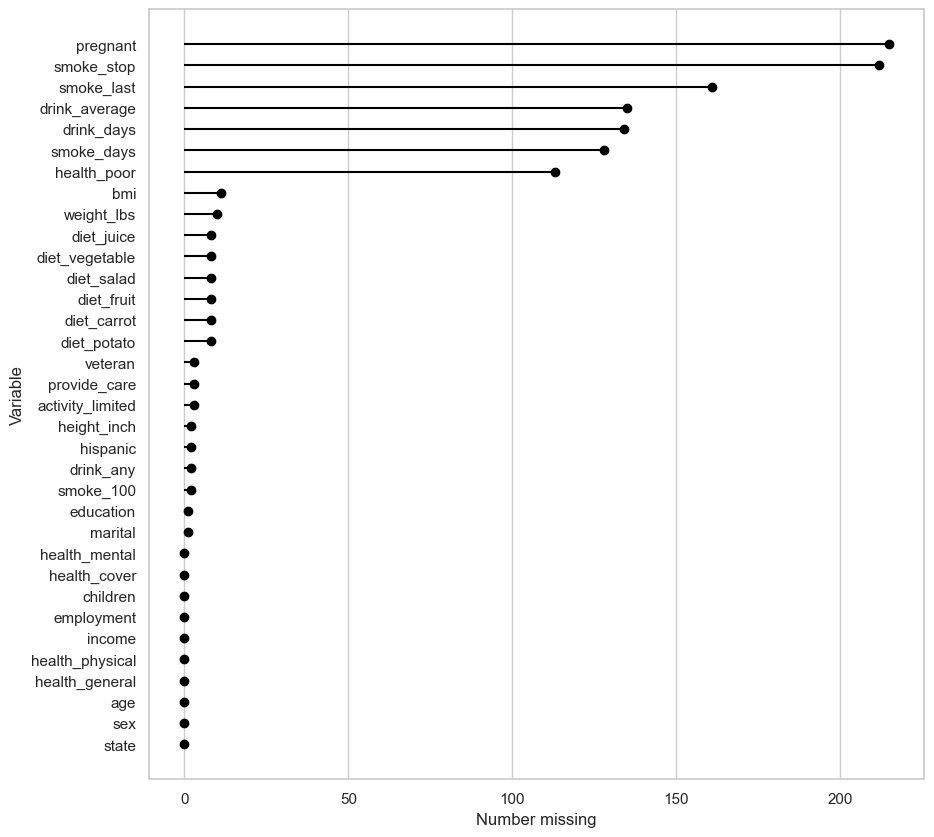

In [32]:
riskfactors_df.missing.missing_variable_plot()

### Casos / Observaciones / Filas

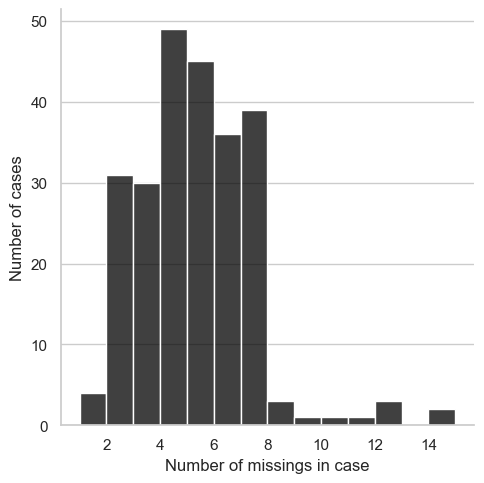

In [33]:
riskfactors_df.missing.missing_case_plot()

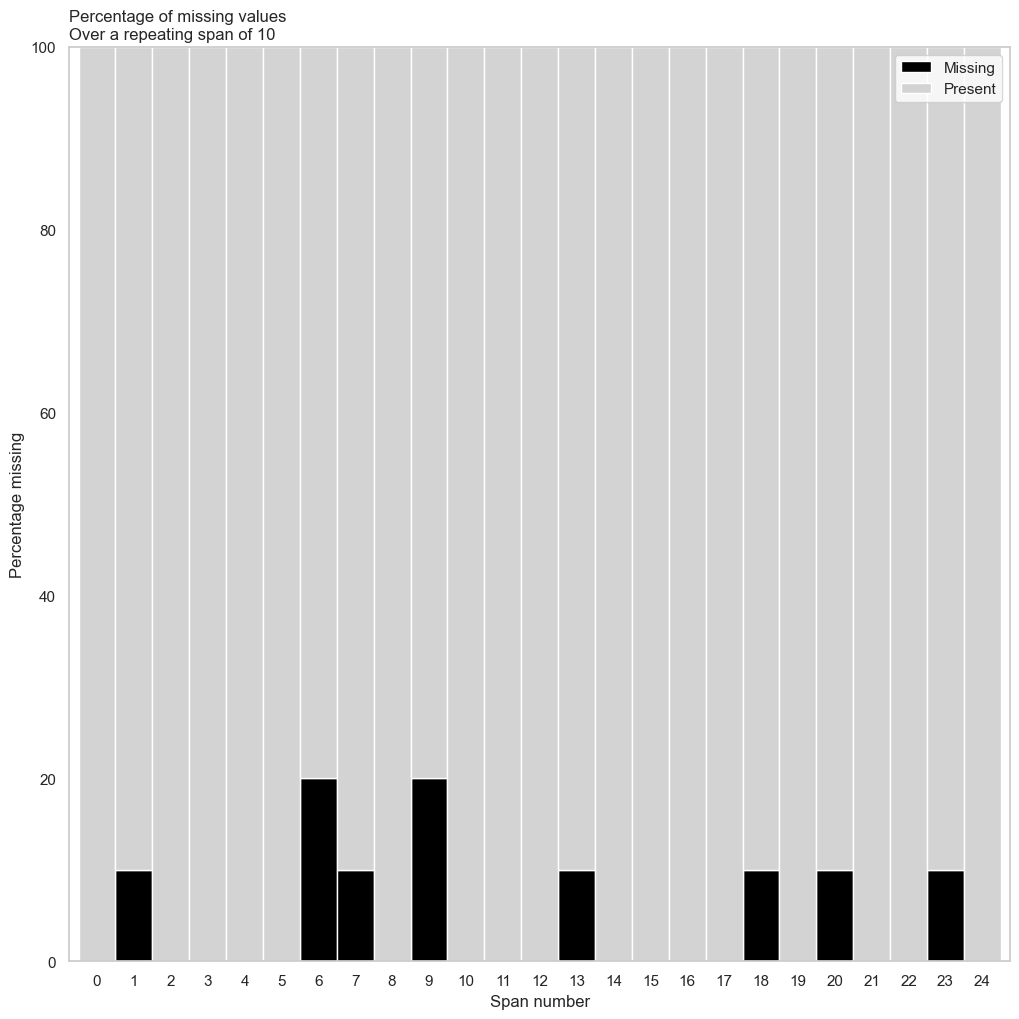

In [34]:
riskfactors_df.missing.missing_variable_span_plot(variable="weight_lbs", span_every=10)

<Axes: >

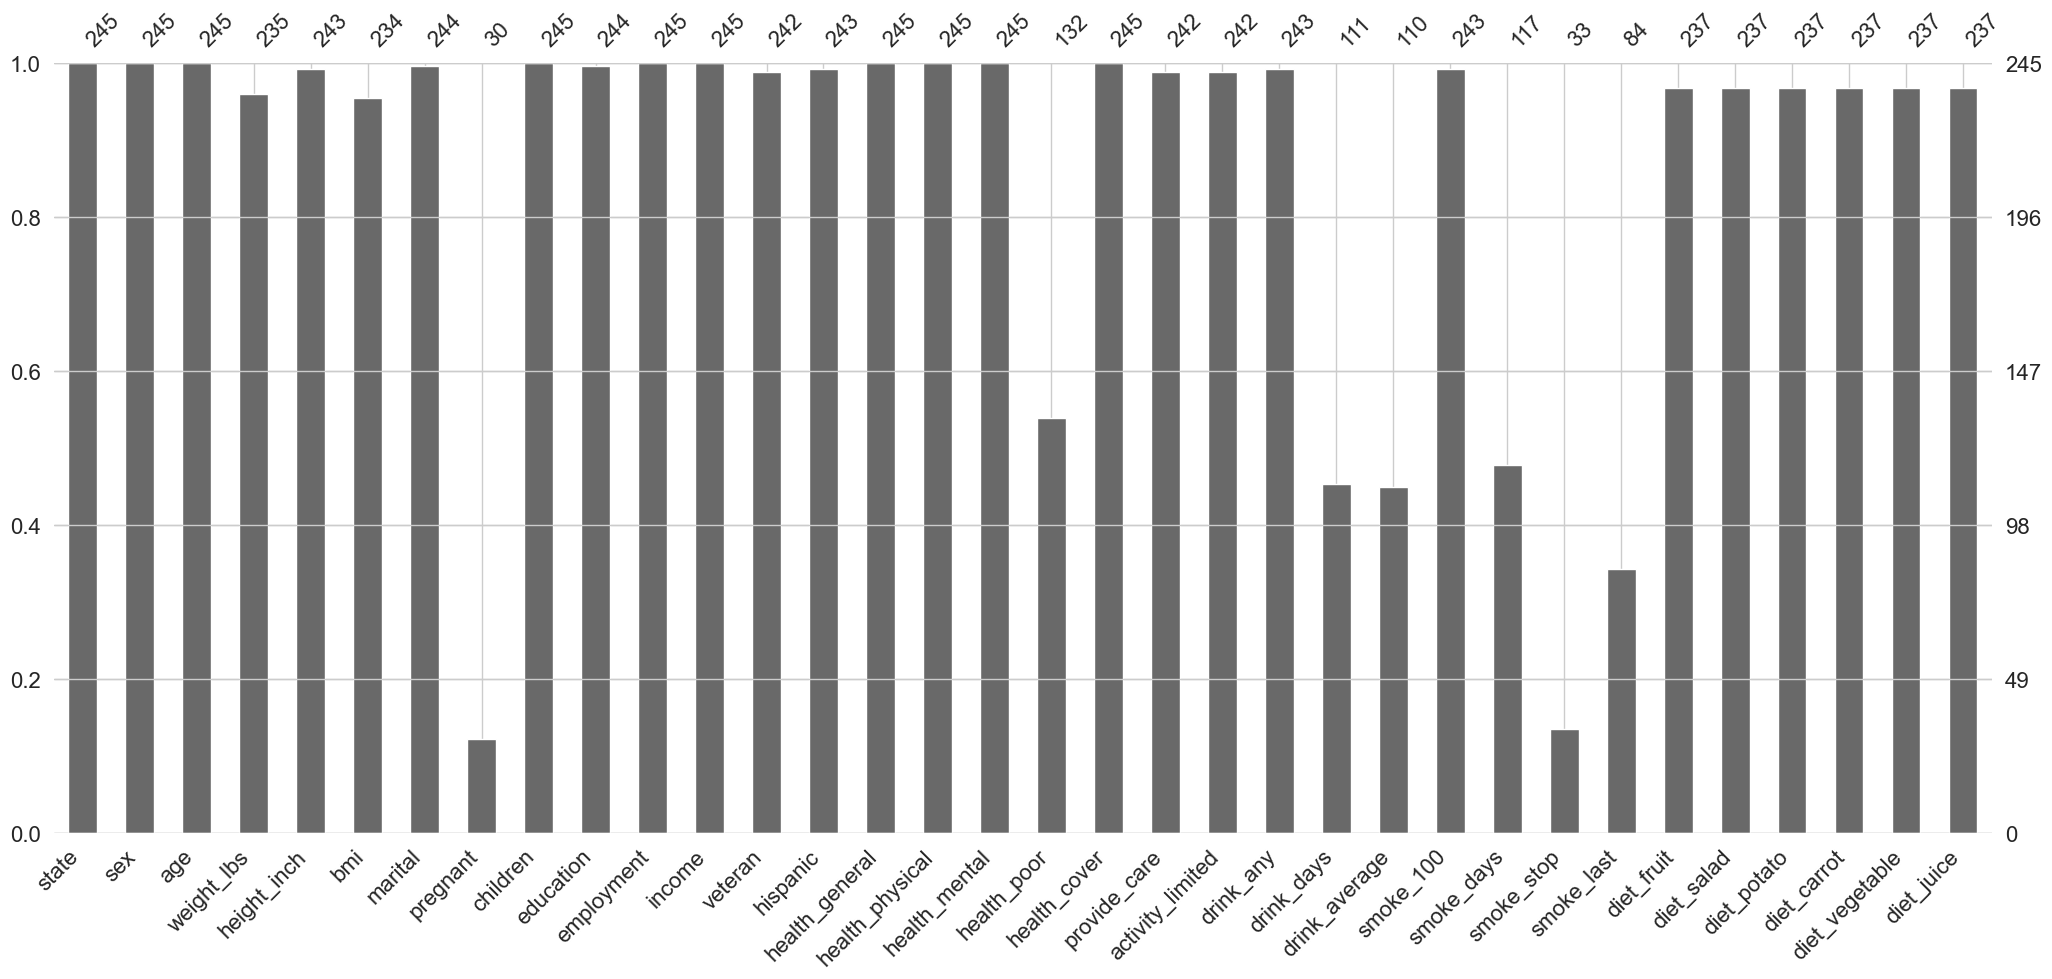

In [35]:
missingno.bar(df=riskfactors_df)

<Axes: >

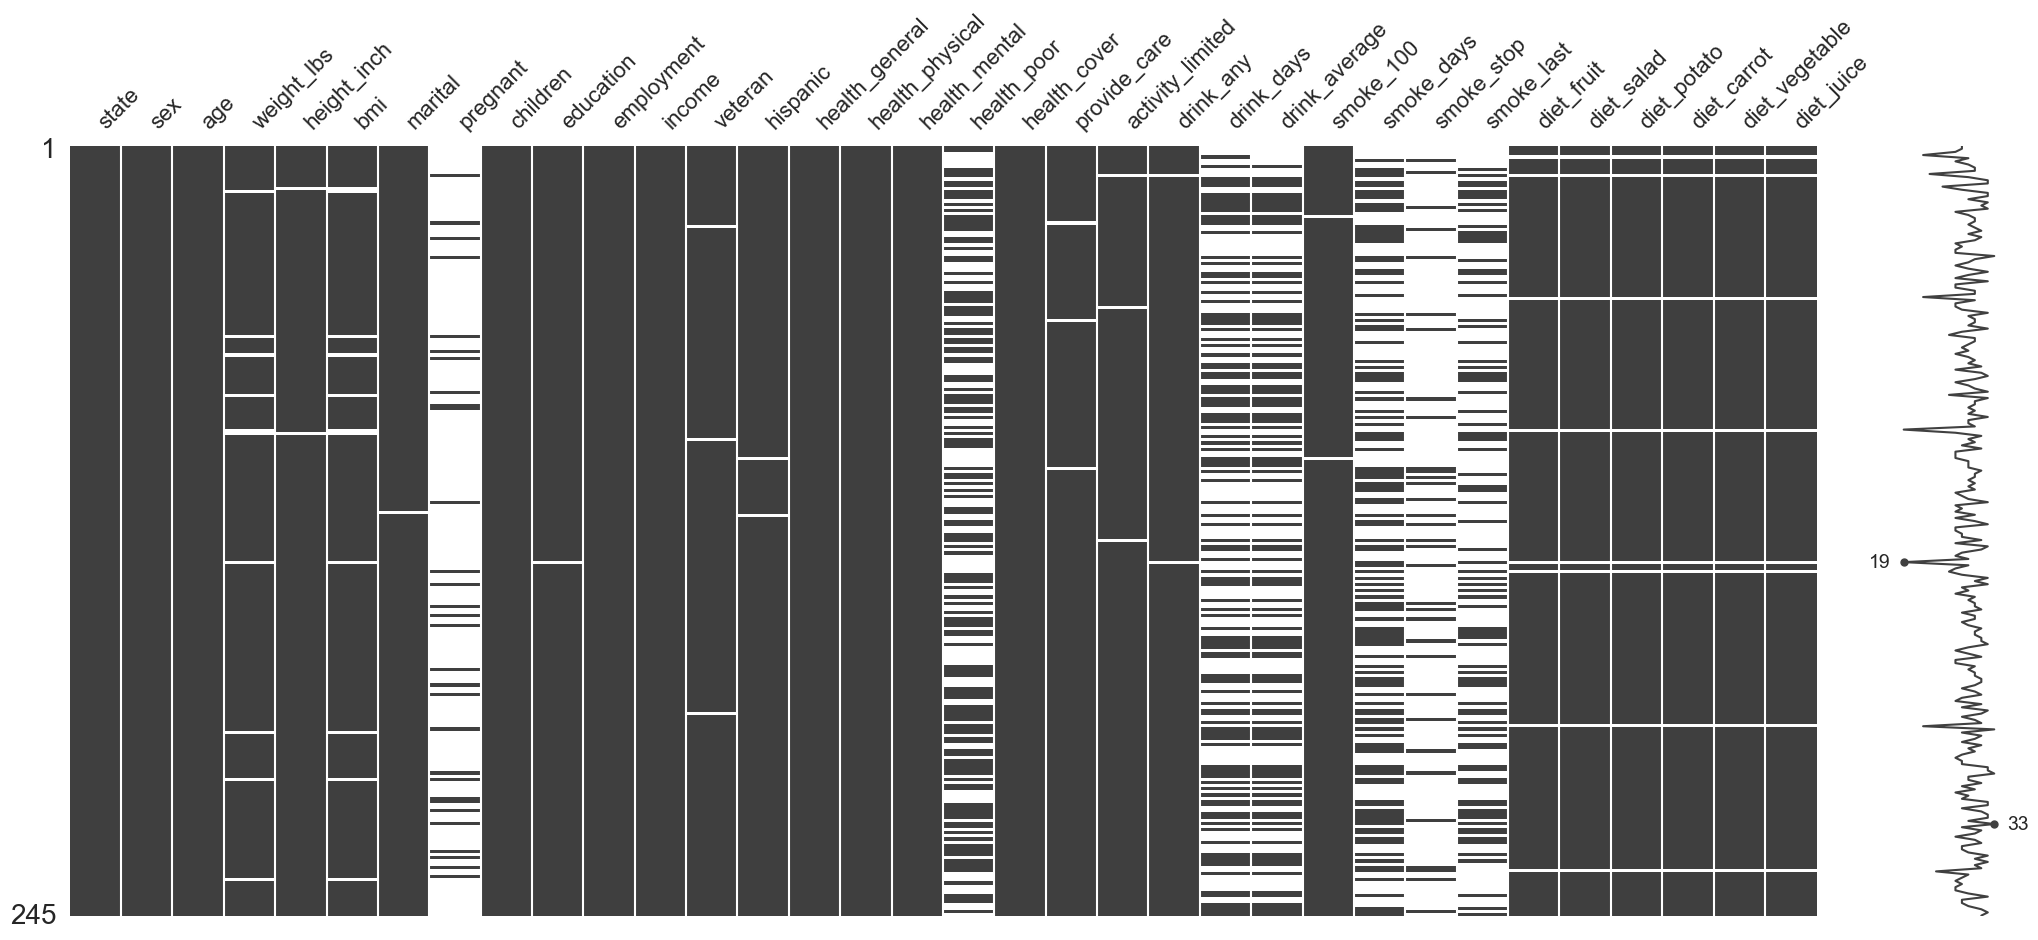

In [36]:
missingno.matrix(df=riskfactors_df)

d:\Platzi\ManejoDatosFaltantes\DeteccionExploracion\venv\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
d:\Platzi\ManejoDatosFaltantes\DeteccionExploracion\venv\Lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object 

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

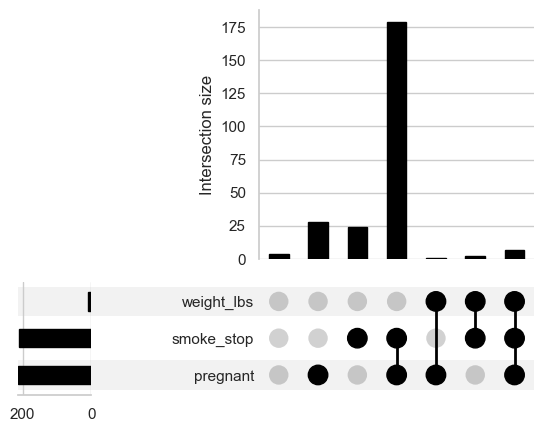

In [37]:
riskfactors_df.missing.missing_upsetplot(variables=["pregnant","smoke_stop","weight_lbs"],element_size=40)

## Codificación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    Al igual que cada persona es una nueva puerta a un mundo diferente, los <b>valores faltantes</b> existen en diferentes formas y colores. Al trabajar con valores faltantes será crítico entender sus distintas representaciones. A pesar de que el conjunto de datos de trabajo pareciera que no contiene valores faltantes, deberás ser capaz de ir más allá de lo observado a simple vista para remover el manto tras el cual se esconde lo desconocido.
    </p>
</div>

### Valores comúnmente asociados a valores faltantes

#### Cadenas de texto

In [38]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

#### Números

In [39]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

### ¿Cómo encontrar los valores comúnmente asociados a valores faltantes?

In [40]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


In [41]:
missing_data_example_df.missing.number_missing()

np.int64(0)

#### Revisar tipos de datos

In [42]:
missing_data_example_df.dtypes

x    object
y    object
z     int64
dtype: object

#### Revisar valores únicos de los datos

In [43]:
missing_data_example_df.x.unique()

array([1, 3, 'NA', -99, -98], dtype=object)

In [44]:
(
    missing_data_example_df
    .select_dtypes(object)
    .apply(pd.unique)
)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

### Sustituyendo valores comúnmente asociados a valores faltantes

#### Sustitución desde la lectura de datos

In [45]:
# Esto no me seirve poque no pillo el csv
# pd.read_csv(
#     './data/missing_data_enconding_example.csv',
#     na_filter=True,
#     na_values=[-99, -1]
# )

#### Sustitución global

In [46]:
(
    missing_data_example_df
    .replace(
        to_replace=[-99, 'NA'],
        value= np.nan
    )
)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26556\3715063018.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(


,x,y,z
0,1.0,A,-100.0
1,3.0,N/A,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,-1.0
5,NaN,G,-1.0


#### Sustitución dirigida

In [47]:
(
    missing_data_example_df
    .replace(
        to_replace={
            'x':{
                -99:np.nan
            }
        }
    )
)

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,NaN,E,-101
4,-98,F,-1
5,NaN,G,-1


## Conversión de valores faltantes implícitos a explícitos

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <br>
    <p>
        <i>
        "<b>Implícito</b> se refiere a todo aquello que se entiende que está incluido
        pero sin ser expresado de forma directa o explícitamente."
        </i>
    </p>
    <p>
    Un <code>valor faltante implícito</code> indica que el valor faltante <b>debería estar incluido</b>
    en el conjunto de datos del análisis, <b>sin que éste lo diga</b> o lo <b>especifique</b>.
    Por lo general, son valores que podemos encontrar al pivotar nuestros datos
    o contabilizar el número de apariciones de combinaciones de las variables de estudio.
    </p>
</div>

In [60]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


### Estrategias para la identificación de valores faltantes implícitos

#### Pivotar la tabla de datos

In [61]:
implicit_to_explicit_df.pivot_wider(
    index="name",
    names_from="time",
    values_from="value"
)

d:\Platzi\ManejoDatosFaltantes\DeteccionExploracion\venv\Lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.pivot` instead.
  return method(self._obj, *args, **kwargs)


,name,afternoon,morning,night
0,lynn,310.0,350.0,NaN
1,zelda,NaN,320.0,NaN


#### Cuantificar ocurrencias de n-tuplas

In [66]:
implicit_to_explicit_df.value_counts(
    subset=["name"]
).reset_index(name="n").query("n < 3")

,name,n
1,zelda,1


### Exponer filas faltantes implícitas a explícitas

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Información</b>
    <p>
       <a href="https://pyjanitor-devs.github.io/pyjanitor/api/functions/#janitor.functions.complete.complete", class="alert-link"><code>janitor.complete()</code></a> está modelada a partir de la función <a href="https://tidyr.tidyverse.org/reference/complete.html", class="alert-link"><code>complete()</code></a> del paquete <a href="https://tidyr.tidyverse.org/index.html", class="alert-link"><code>tidyr</code></a> y es un <i>wrapper</i> alrededor de <a href="https://pyjanitordevs.github.io/pyjanitor/api/functions/#janitor.functions.expand_grid.expand_grid", class="alert-link"><code>janitor.expand_grid()</code></a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.merge()</code></a> y <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.fillna()</code></a>. En cierto modo, es lo contrario de <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html", class="alert-link"><code>pd.dropna()</code></a>, ya que expone implícitamente las filas que faltan.
    </p>
    <p>
    Son posibles combinaciones de nombres de columnas o una lista/tupla de nombres de columnas, o incluso un  diccionario de nombres de columna y nuevos valores.
    </p>
    <p>
    Las columnas <a href="https://pandas.pydata.org/docs/user_guide/advanced.html"><code>MultiIndex</code></a> no son complatibles.
    </p>
</div>

#### Exponer n-tuplas de valores faltantes

Ejemplo, encontrar los pares faltantes de `name` y `time`.

#### Limitar la exposición de n-tuplas de valores faltantes

#### Rellenar los valores faltantes

#### Limitar el rellenado de valores faltantes implícitos

## Tipos de valores faltantes

### _Missing Completely At Random_ (MCAR)

### _Missing At Random_ (MAR)

### _Missing Not At Random_ (MNAR)

## Concepto y aplicación de la matriz de sombras (_i.e._, _shadow matrix_)

 ### Construcción de la matriz de sombras

### Utilizar función de utilería `bind_shadow_matrix()`

### Explorar estadísticos utilizando las nuevas columnas de la matriz de sombras

## Visualización de valores faltantes en una variable

## Visualización de valores faltantes en dos variables

## Correlación de nulidad

## Eliminación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    La eliminación de valores faltantes <b>asume</b> que los valores faltantes están perdidos
    completamente al azar (<code>MCAR</code>). En cualquier otro caso, realizar una
    eliminación de valores faltantes podrá ocasionar <b>sesgos</b> en los
    análisis y modelos subsecuentes.
    </p>
</div>

Primero observa el número total de observaciones y variables que tiene tu conjunto de datos.

### _Pairwise deletion_ (eliminación por pares)

### _Listwise Deletion or Complete Case_ (Eliminación por lista o caso completo)

#### Con base en 1 columna

#### Con base en 2 o más columnas

### Representación gráfica tras la eliminación de los valores faltantes

## Imputación básica de valores faltantes

### Imputación con base en el contexto

In [49]:
implicit_to_explicit_df = pd.DataFrame(
    data={
        "name": ["lynn", np.nan, "zelda", np.nan, "shadowsong", np.nan],
        "time": ["morning", "afternoon", "morning", "afternoon", "morning", "afternoon",],
        "value": [350, 310, 320, 350, 310, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350
1,NaN,afternoon,310
2,zelda,morning,320
3,NaN,afternoon,350
4,shadowsong,morning,310
5,NaN,afternoon,320


### Imputación de un único valor

## Continúa aprendiendo sobre el manejo de valores faltantes

<div class="alert alert-success">
    <b style="font-size: 1.5em;">✅ ¡Felicidades por terminar el curso!</b>
    <p>
Has aprendido bastante sobre la exploración y manipulación de valores faltantes.
    </p>
    <p>
Empezaste conociento las principales operaciones al trabajar con valores faltantes. Ahora, eres consciente de que estas operaciones no son universales y cada software decide tratar a los valores faltantes a su conveniencia.
    </p>
    <p>
Y, hablando de conveniencias, comenzaste tu camino en la exploración de valores faltantes a través de una representación universal de qué es lo que faltaba. No obstante, no pasó mucho para darte cuenta de que los valores faltantes pueden existir en formas muy variables. Incluso, en formas en las que no sabemos que nos faltan estos valores en sí mismos. 
    </p>
    <p>
Con los valores faltantes ya expuestos, te conviertes en una persona capaz de explorarlos en profundidad de forma estadística y visual. Entendiendo así, los distintos mecanismos que pueden tener los valores faltantes: MCAR, MAR y MNAR.
    </p>
    <p>
A su vez, aprendiste las bases sobre cómo tratarlos a través de la eliminación de elementos o la imputación de valores de una forma básica y sencilla. Por lo tanto, necesitarás continuar tu camino de aprendizaje con un curso que te permita profundizar en estas técnicas de tratamiento para valores faltantes.
    </p>
    <p>
Te recomiendo continuar con mi <a href="https://platzi.com/cursos/datos-faltantes-imputacion/">Curso de Manejo de Datos Faltantes: Imputación</a>. Estoy seguro de que tus habilidades adquiridas hasta el momento mejorarán, permitiéndote realizar análisis cada vez más complejos y cercanos al mundo real.
    </p>
    <p>
    Con mucha alegría por tu logro,
   Jesús Vélez Santiago
    </p>
    
</div>

## Información de sesión

In [50]:
session_info.show()

d:\Platzi\ManejoDatosFaltantes\DeteccionExploracion\venv\Lib\site-packages\session_info\main.py:213: DeprecationWarning: Accessing jsonschema.__version__ is deprecated and will be removed in a future release. Use importlib.metadata directly to query for jsonschema's version.
  mod_version = _find_version(mod.__version__)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=694a3d08-7f18-421d-9e2f-c2820a79680e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>